In [50]:
import pandas as pd
import statsmodels.formula.api as smf 
import statsmodels.api as sm  
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt
import numpy as np

In [7]:
df = pd.read_csv('../data/hospitalisations.csv')


df["Date d'admission"] = pd.to_datetime(df["Date d'admission"])
df['total'] = df["Hors soins intensifs"] + df['Aux soins intensifs']
df.head(5)

,Date d'admission,Hors soins intensifs,Aux soins intensifs,total
0,2020-02-24,3,1,4
1,2020-02-25,1,1,2
2,2020-02-26,2,1,3
3,2020-02-27,1,0,1
4,2020-02-28,1,1,2


In [48]:
start_date = '2020-12-06'
end_date = '2021-01-13'

#mask for The 25/12/2020 lockdown
lockdown_2 = (df["Date d'admission"]  > start_date) & (df["Date d'admission"]  < end_date)

df_lockdown_2 = df.loc[lockdown_2]
#centralize the running variable date d'admission at 2020-12-25
#df_lockdown_2["Date d'admission"] = "2020-12-25"

df_lockdown_2.reset_index(drop=True, inplace=True)
df_lockdown_2.set_index(df_lockdown_2.index)
df_lockdown_2['x1'] = df_lockdown_2.index
#df_lockdown_2.set_index(df_lockdown_2.x1)
df_lockdown_2


,Date d'admission,Hors soins intensifs,Aux soins intensifs,total,x1
0,2020-12-07,68,13,81,0
1,2020-12-08,86,13,99,1
2,2020-12-09,86,12,98,2
3,2020-12-10,79,15,94,3
4,2020-12-11,89,10,99,4
5,2020-12-12,83,12,95,5
6,2020-12-13,91,8,99,6
7,2020-12-14,93,18,111,7
8,2020-12-15,105,14,119,8
9,2020-12-16,92,10,102,9


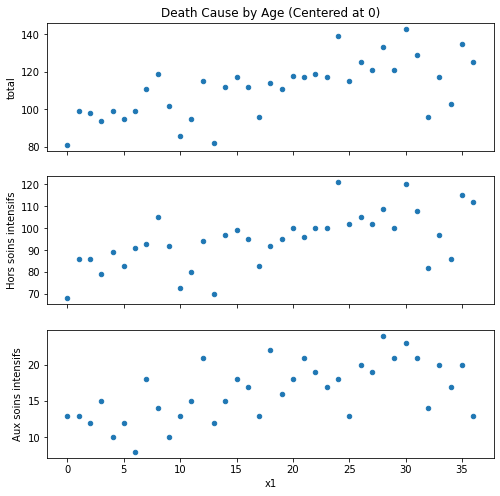

In [45]:
plt.figure(figsize=(8,8))
ax = plt.subplot(3,1,1)
df_lockdown_2.plot.scatter(x='x1', y="total", ax=ax)
plt.title("Death Cause by Age (Centered at 0)")
#xvline = '2020-12-25'
ax = plt.subplot(3,1,2, sharex=ax)
df_lockdown_2.plot.scatter(x='x1', y="Hors soins intensifs", ax=ax)

ax = plt.subplot(3,1,3, sharex=ax)
df_lockdown_2.plot.scatter(x='x1', y="Aux soins intensifs", ax=ax);

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     14.75
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           2.45e-05
Time:                        11:37:06   Log-Likelihood:                -141.05
No. Observations:                  37   AIC:                             288.1
Df Residuals:                      34   BIC:                             292.9
Df Model:                           2                                         
Covariance Type:                  HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.3461      3.404     28.300      0.0

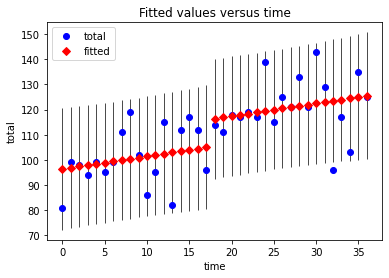

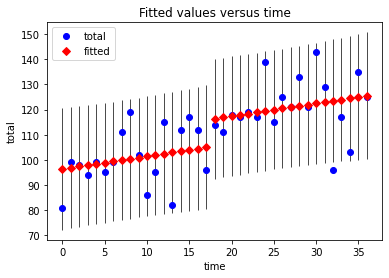

In [52]:
df_lockdown_2['Group'] = np.where(df_lockdown_2["Date d'admission"] >= '2020-12-25', "After", "Before")

y = df_lockdown_2.total

x = pd.DataFrame(sm.add_constant(df_lockdown_2.index.astype(int)))

x.columns = ['const', 'time']

x['cutoff'] = (df_lockdown_2["Group"] == 'After').astype(int)

#x['cutoffslope_poly'] = x['cutoff'] * x.time * x.time #poly fit on the right side
#x['time2'] = x.time ** 2

re = sm.OLS(y,x).fit(cov_type="HC2")
print(re.summary())

sm.graphics.plot_fit(re, 'time') #time is equal to x axis



                             OLS Regression Results                             
Dep. Variable:     Hors soins intensifs   R-squared:                       0.406
Model:                              OLS   Adj. R-squared:                  0.371
Method:                   Least Squares   F-statistic:                     10.75
Date:                  Sat, 23 Jan 2021   Prob (F-statistic):           0.000241
Time:                          11:39:47   Log-Likelihood:                -136.60
No. Observations:                    37   AIC:                             279.2
Df Residuals:                        34   BIC:                             284.0
Df Model:                             2                                         
Covariance Type:                    HC2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.1697      3.298

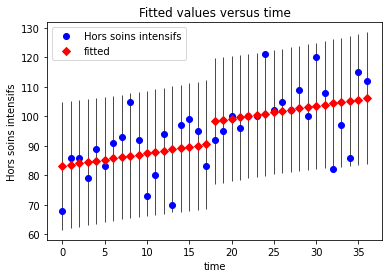

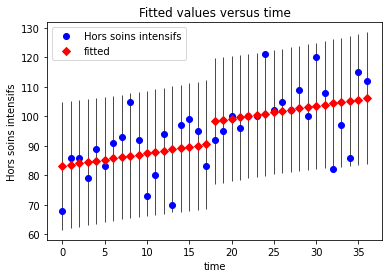

In [58]:
y = df_lockdown_2["Hors soins intensifs"]

x = pd.DataFrame(sm.add_constant(df_lockdown_2.index.astype(int)))

x.columns = ['const', 'time']

x['cutoff'] = (df_lockdown_2["Group"] == 'After').astype(int)

#x['cutoffslope_poly'] = x['cutoff'] * x.time * x.time #poly fit on the right side
#x['time2'] = x.time ** 2

re = sm.OLS(y,x).fit(cov_type="HC2")
print(re.summary())

sm.graphics.plot_fit(re, 'time') #time is equal to x axis

                             OLS Regression Results                            
Dep. Variable:     Aux soins intensifs   R-squared:                       0.444
Model:                             OLS   Adj. R-squared:                  0.394
Method:                  Least Squares   F-statistic:                     11.39
Date:                 Sat, 23 Jan 2021   Prob (F-statistic):           2.77e-05
Time:                         11:39:23   Log-Likelihood:                -92.503
No. Observations:                   37   AIC:                             193.0
Df Residuals:                       33   BIC:                             199.5
Df Model:                            3                                         
Covariance Type:                   HC2                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.6790   

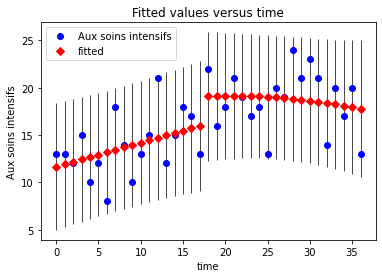

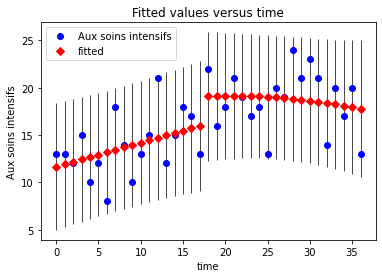

In [55]:
y = df_lockdown_2["Aux soins intensifs"]

x = pd.DataFrame(sm.add_constant(df_lockdown_2.index.astype(int)))

x.columns = ['const', 'time']

x['cutoff'] = (df_lockdown_2["Group"] == 'After').astype(int)

x['cutoffslope_poly'] = x['cutoff'] * x.time * x.time #poly fit on the right side
#x['time2'] = x.time ** 2

re = sm.OLS(y,x).fit(cov_type="HC2")
print(re.summary())

sm.graphics.plot_fit(re, 'time') #time is equal to x axis